In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import math as math
import itertools
import os

In [2]:
# Define a function that takes a text file, gets rid of the first 40 lines, and then breaks the file into
# segment, where each segment is for one event (script specifically for lhe file with 11,000 events)

def read(filename):

    group_size = 8

    with open(filename, 'r') as file:
        lines = file.readlines()

        lines = lines[40:88039]

    events = []

    for i in range(0, len(lines), group_size):
        event = lines[i:i+group_size]
        events.append(event)

    return events

In [3]:
# Define a function that reads all the files in a folder, uses the 'read' function to make an array
# for each file, and then flattens those arrays into one big array

def combine(dir):

    directory = dir
    filenames = os.listdir(directory)

    bigEvents = []

    for filename in filenames:

        file_path = os.path.join(directory, filename)

        bigEvents.append(read(file_path))

    return list(itertools.chain(*bigEvents))

In [9]:
# Make big arrays for each COME, each Ms (10 arrays)

_13TeV_50Ms_ = combine('mc23_13TeV.100001.STRPy8EG_STR_Ms05000.evgen.TXT.e0000')
_13TeV_55Ms_ = combine('mc23_13TeV.100002.STRPy8EG_STR_Ms05500.evgen.TXT.e0000')
_13TeV_60Ms_ = combine('mc23_13TeV.100003.STRPy8EG_STR_Ms06000.evgen.TXT.e0000')
_13TeV_65Ms_ = combine('mc23_13TeV.100004.STRPy8EG_STR_Ms06500.evgen.TXT.e0000')
_13TeV_70Ms_ = combine('mc23_13TeV.100005.STRPy8EG_STR_Ms07000.evgen.TXT.e0000')

_13p6TeV_50Ms_ = combine('mc23_13p6TeV.100001.STRPy8EG_STR_Ms05000.evgen.TXT.e0000')
_13p6TeV_55Ms_ = combine('mc23_13p6TeV.100002.STRPy8EG_STR_Ms05500.evgen.TXT.e0000')
_13p6TeV_60Ms_ = combine('mc23_13p6TeV.100003.STRPy8EG_STR_Ms06000.evgen.TXT.e0000')
_13p6TeV_65Ms_ = combine('mc23_13p6TeV.100004.STRPy8EG_STR_Ms06500.evgen.TXT.e0000')
_13p6TeV_70Ms_ = combine('mc23_13p6TeV.100005.STRPy8EG_STR_Ms07000.evgen.TXT.e0000')

test2 = combine('testFolder2')
y10 = read('y10.lhe')
test3 = combine('testFolder3')

# Lepton and Photon Scattering

_14TeV_20Ms

In [6]:
# Script for reading in an array created by the read() function and counting how many interactions are gg, gq

array = _13TeV_50Ms_

gg, gq = 0, 0

print(len(array))

for i in range(len(array)-1):

    if array[i][1][2] == '6':
        gg = gg + 1

    else:
        gq = gq + 1

print(gg, gq)

110000
19810 90189


In [10]:
# We now have 10 arrays of length 110000, each element is an LHE entry for each collision.
# We write a function that looks at every element and creates arrays for kinematic variables of interest

def pythag(x1, x2, x3):

    return math.sqrt(x1**2 + x2**2 + x3**2)

def sort(array):

    # p1, p2, E1, E2, m_initial = [], [], [], [], []

    # m_final, px_jet, px_photon, py_jet, py_photon, pz_jet, pz_photon, p_jet, p_photon, E_jet, E_photon, pT_jet, pT_photon, theta_jet, theta_photon, phi_jet, phi_photon = [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []

    m_final, px_lepton, px_photon, py_lepton, py_photon, pz_lepton, pz_photon, p_lepton, p_photon, E_lepton, E_photon, pT_lepton, pT_photon, theta_lepton, theta_photon, phi_lepton, phi_photon = [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []

    gamma, beta, y, Y = [], [], [], []

    cosThetaStar_photon_8, cosThetaStar_photon_9, cosThetaStar_lepton_10, cosThetaStar_lepton_11 = [], [], [], []
    thetaStar_photon_8, thetaStar_photon_9, thetaStar_lepton_10, thetaStar_lepton_11 = [], [], [], []
    cosTheta_photon_8, cosTheta_photon_9, cosTheta_lepton_10, cosTheta_lepton_11 = [], [], [], []

    pz_jet_cm, pz_photon_cm, p_jet_cm, p_photon_cm = [], [], [], []

    yy, ll = 0, 0

    for i in range(len(array)):

        p1.append( float(array[i][2][46:59]) / 1000 )                         # momentum of first parton (+z)
        p2.append( float(array[i][3][46:59]) /1000 )                          # momentum of second parton (-z)
        E1.append( float(array[i][2][60:73]) / 1000 )                         # energy of first parton
        E2.append( float(array[i][3][60:73]) / 1000 )                         # energy of second parton
        m_initial.append( math.sqrt( (E1[i]+E2[i])**2 - (p1[i]+p2[i])**2 ) )  # initial mass of two incoming partons
        gamma.append( (E1[i]+E2[i]) / (m_initial[i]) )                        # gamma factor
        beta.append( (p1[i]+p2[i]) / (E1[i]+E2[i]) )                          # beta factor
        process = array[i][1][2]                                              # gg or gq process

        ### Reading in raw data

        if array[i][4][0:2] == '22':

            px_jet.append(  float(array[i][5][18:31]) / 1000 )                # x momentum
            px_photon.append( float(array[i][4][18:31]) / 1000 )

            py_jet.append( float(array[i][5][32:45]) / 1000 )                 # y momentum
            py_photon.append( float(array[i][4][32:45]) / 1000 )

            pz_jet.append( float(array[i][5][46:59]) / 1000 )                 # z momentum
            pz_photon.append( float(array[i][4][46:59]) / 1000 )

            E_jet.append( float(array[i][5][60:73]) / 1000 )                  # Energy
            E_photon.append( float(array[i][4][60:73]) / 1000 )

        if array[i][5][0:2] == '22':

            px_jet.append(  float(array[i][4][18:31]) / 1000 )                     # x momentum
            px_photon.append( float(array[i][5][18:31]) / 1000 )

            py_jet.append( float(array[i][4][32:45]) / 1000 )                      # y momentum
            py_photon.append( float(array[i][5][32:45]) / 1000 )

            pz_jet.append( float(array[i][4][46:59]) / 1000 )                      # z momentum
            pz_photon.append( float(array[i][5][46:59]) / 1000 )

            E_jet.append( float(array[i][4][60:73]) / 1000 )                       # Energy
            E_photon.append( float(array[i][5][60:73]) / 1000 )

        # Calculations with raw data

        p_jet.append(pythag(px_jet[i], py_jet[i], pz_jet[i]))                      # p
        p_photon.append(pythag(px_photon[i], py_photon[i], pz_photon[i]))

        pT_jet.append( math.sqrt( px_jet[i]**2 + py_jet[i]**2 ) )                  # pT
        pT_photon.append( math.sqrt( px_photon[i]**2 + py_photon[i]**2 ) )

        y_jet = 0.5 * math.log( (E_jet[i] + pz_jet[i]) / (E_jet[i] - pz_jet[i]) )                   # y and Y
        y_photon = 0.5 * math.log( (E_photon[i] + pz_photon[i]) / (E_photon[i] - pz_photon[i]) )
        y.append(0.5 * abs(y_jet - y_photon))
        Y.append(0.5 * abs(y_jet + y_photon))

        theta_photon.append( math.acos(pz_photon[i]/p_photon[i]) )                 # theta in lab frame
        theta_jet.append( math.acos(pz_jet[i]/p_jet[i]) )
        if process == '6':
            cosTheta_photon_6.append(math.cos(theta_photon[i]))
            cosTheta_jet_6.append(math.cos(theta_jet[i]))
        if process == '7':
            cosTheta_photon_7.append(math.cos(theta_photon[i]))
            cosTheta_jet_7.append(math.cos(theta_jet[i]))

        pz_photon_cm.append( gamma[i] * ( pz_photon[i] - E_photon[i]*beta[i] ) )   # pz in resonance frame
        pz_jet_cm.append( gamma[i] * (pz_jet[i] - E_jet[i]*beta[i] ) )

        p_jet_cm.append(pythag(px_jet[i], py_jet[i], pz_jet_cm[i]))                # p in resonance frame
        p_photon_cm.append(pythag(px_photon[i], py_photon[i], pz_photon_cm[i]))
                                                                                   # theta and costheta in resonance frame
        if process == '6':   ## gg process
            cosThetaStar_photon_6.append( pz_photon_cm[i]/p_photon_cm[i] )
            cosThetaStar_jet_6.append( pz_jet_cm[i]/p_jet_cm[i] )
            thetaStar_photon_6.append( math.acos(pz_photon_cm[i]/p_photon_cm[i]) )
            thetaStar_jet_6.append( math.acos(pz_jet_cm[i]/p_jet_cm[i]) )
        if process == '7':   ## gq process
            cosThetaStar_photon_7.append( pz_photon_cm[i]/p_photon_cm[i] )
            cosThetaStar_jet_7.append( pz_jet_cm[i]/p_jet_cm[i] )
            thetaStar_photon_7.append( math.acos(pz_photon_cm[i]/p_photon_cm[i]) )
            thetaStar_jet_7.append( math.acos(pz_jet_cm[i]/p_jet_cm[i]) )

        phi_photon.append( math.atan(py_photon[i]/px_photon[i]) )                   # azimuthal angle in lab frame
        if py_photon[i] < 0 and px_photon[i] < 0:
            phi_photon[i] = phi_photon[i] + math.pi
        if py_photon[i] < 0 < px_photon[i]:
            phi_photon[i] = phi_photon[i] + 2*math.pi
        if px_photon[i] < 0 < py_photon[i]:
            phi_photon[i] = math.pi + phi_photon[i]
        phi_jet.append( math.atan(py_jet[i]/px_jet[i]) )
        if py_jet[i] < 0 and px_jet[i] < 0:
            phi_jet[i] = phi_jet[i] + math.pi
        if py_jet[i] < 0 < px_jet[i]:
            phi_jet[i] = phi_jet[i] + 2*math.pi
        if px_jet[i] < 0 < py_jet[i]:
            phi_jet[i] = math.pi + phi_jet[i]

        pz = pz_jet[i] + pz_photon[i]                                               # invariant mass of resonance
        py = py_jet[i] + py_photon[i]
        px = px_jet[i] + px_photon[i]
        p = pythag(px, py, pz)
        E = E_jet[i] + E_photon[i]
        mjgamma.append(math.sqrt(E**2 - p**2))

    return mjgamma, px_jet, px_photon, py_jet, py_photon, pz_jet, pz_photon, p_jet, p_photon, E_jet, E_photon, pT_jet, pT_photon, theta_jet, theta_photon, phi_jet, phi_photon, E1, E2, p1, p2, m_initial, thetaStar_photon_6, thetaStar_jet_6, thetaStar_photon_7, thetaStar_jet_7, cosThetaStar_photon_6, cosThetaStar_jet_6, cosThetaStar_photon_7, cosThetaStar_jet_7, gamma, beta, y, Y, cosTheta_photon_6, cosTheta_jet_6, cosTheta_photon_7, cosTheta_jet_7

In [24]:
# sort the array
mjgamma5, px_jet, px_photon, py_jet, py_photon, pz_jet, pz_photon, p_jet, p_photon, E_jet, E_photon, pT_jet, pT_photon, theta_jet, theta_photon, phi_jet, phi_photon, E1, E2, p1, p2, m_initial, thetaStar_photon_6, thetaStar_jet_6, thetaStar_photon_7, thetaStar_jet_7, cosThetaStar_photon_6, cosThetaStar_jet_6, cosThetaStar_photon_7, cosThetaStar_jet_7, gamma, beta, y, Y, cosTheta_photon_6, cosTheta_jet_6, cosTheta_photon_7, cosTheta_jet_7 = sort(y10)

del_phi, del_theta = [], []
for i in range(len(phi_jet)):
    del_phi.append( abs(phi_jet[i]-phi_photon[i]) )
    del_theta.append( theta_jet[i] - theta_photon[i] )

In [12]:
# Make histogram function for plotting histograms that involve one for jet, one for photon

def histogram(photon, jet, names, labels, measure, stringscale):

    fig, ax = plt.subplots()

    if measure == 'GeV':
        bin_width = 0.05
        minval = math.floor( min(jet)/0.05 )*0.05
        maxval = math.ceil( max(jet)/0.05)*0.05
        ax.set_ylabel('Entries per 50 GeV bin')
        ax.set_yscale('log')

    if measure == 'rad':
        bin_width = 0.02
        minval = math.floor(min(jet)/0.02)*0.02
        maxval = math.ceil(max(jet)/0.02)*0.02
        ax.set_ylabel('Entries per 0.02 rad bin')

    bins = np.arange(minval, maxval + bin_width, bin_width)
    ax.set_xlabel(labels + ', jet')
    ax.hist(jet, bins=bins, color='white', edgecolor='red', alpha=1, histtype='step')
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)

    plt.savefig('./Histograms/' + stringscale + names + '_jet.pdf',dpi=100,bbox_inches='tight',format='pdf')
    plt.show()
    plt.clf()

############################################

    fig, ax = plt.subplots()

    if measure == 'GeV':
        bin_width = 0.05
        minval = math.floor( min(photon)/0.05 )*0.05
        maxval = math.ceil( max(photon)/0.05 )*0.05
        ax.set_ylabel('Entries per 50 GeV bin')
        ax.set_yscale('log')

    if measure == 'rad':
        bin_width = 0.02
        minval = math.floor(min(photon)/0.02)*0.02
        maxval = math.ceil(max(photon)/0.02)*0.02
        ax.set_ylabel('Entries per 0.02 rad bin')

    bins = np.arange(minval, maxval + bin_width, bin_width)
    ax.set_xlabel(labels + ', photon')
    ax.hist(photon, bins=bins, color='white', edgecolor='blue', alpha=1, histtype='step')
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)

    plt.savefig('./Histograms/' + stringscale + names + '_photon.pdf',dpi=100,bbox_inches='tight',format='pdf')
    plt.show()
    plt.clf()

TypeError: text() missing 1 required positional argument: 's'

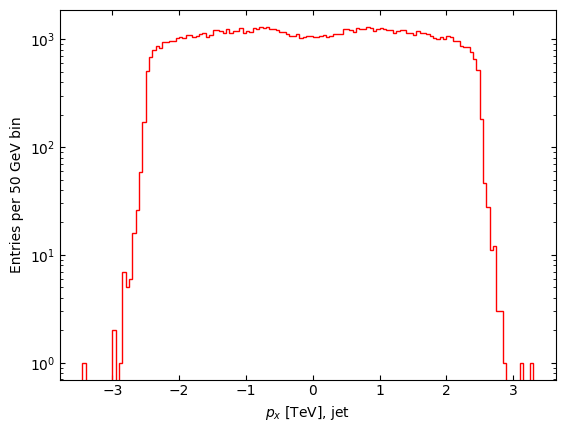

In [14]:
# loop for making histograms for all the data that involves one plot for jet, one plot for photon

jets = [px_jet, py_jet, pz_jet, p_jet, E_jet, pT_jet]
jetsAngles = [theta_jet, phi_jet, thetaStar_jet_6, thetaStar_jet_7]

photons = [px_photon, py_photon, pz_photon, p_photon, E_photon, pT_photon]
photonsAngles = [theta_photon, phi_photon, thetaStar_photon_6, thetaStar_photon_7]

names = ['px', 'py', 'pz', 'p', 'E', 'pT']
namesAngles = ['theta', 'phi', 'thetaStar6', 'thetaStar7']

labels = [r'$p_{x}$ [TeV]', r'$p_{y}$ [TeV]', r'$p_{z}$ [TeV]', r'$p$ [TeV]', r'$E$ [TeV]', r'$p_{T}$ [TeV]']
labelsAngles = [r'$\theta$ [rad]', r'$\phi$ [rad]', r'$\theta^{*} (gg)$ [rad]', r'$\theta^{*} (gq)$ [rad]']

for i in range(len(names)):
    histogram(photons[i], jets[i], names[i], labels[i], 'GeV', '70p6Ms')
for i in range(len(namesAngles)):
    histogram(photonsAngles[i], jetsAngles[i], namesAngles[i], labelsAngles[i], 'rad', '70p6Ms')

In [105]:
# function for getting invariant masses and angle deltas

def moreHist(array, angleArray, arrayLabel, angleLabel, arrayName, angleName, stringscale):

    fig, ax = plt.subplots()

    bin_width = 0.05
    minval = math.floor( min(array)/0.05 )*0.05
    maxval = math.ceil( max(array)/0.05)*0.05
    ax.set_ylabel('Entries per 50 GeV bin')

    bins = np.arange(minval, maxval + bin_width, bin_width)
    ax.hist(array, bins=bins, color='white', edgecolor='green', alpha=1, histtype='step')

    ax.set_xlabel(arrayLabel)
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.set_yscale('log')

    plt.savefig('./Histograms/'+stringscale+arrayName+'(log).pdf',dpi=100,bbox_inches='tight',format='pdf')
    plt.show()
    plt.clf()

    fig, ax = plt.subplots()

    ax.set_ylabel('Entries per 50 GeV bin')

    bins = np.arange(minval, maxval + bin_width, bin_width)
    ax.hist(array, bins=bins, color='white', edgecolor='green', alpha=1, histtype='step')

    ax.set_xlabel(arrayLabel)
    ax.set_ylabel('Entries per 50 GeV bin')
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)

    plt.savefig('./Histograms/'+stringscale+arrayName+'(lin).pdf',dpi=100,bbox_inches='tight',format='pdf')
    plt.show()
    plt.clf()

###########################################

    fig, ax = plt.subplots()

    bin_width = 0.02
    minval = math.floor(min(angleArray)/0.02)*0.02
    maxval = math.ceil(max(angleArray)/0.02)*0.02

    bins = np.arange(minval, maxval + bin_width, bin_width)
    ax.hist(angleArray, bins=100, color='white', edgecolor='green', alpha=1, histtype='step')

    ax.set_xlabel(angleLabel)
    ax.set_ylabel('Entries per 0.02 rad bin')
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)

    plt.savefig('./Histograms/'+stringscale+angleName,dpi=100,bbox_inches='tight',format='pdf')
    plt.show()
    plt.clf()

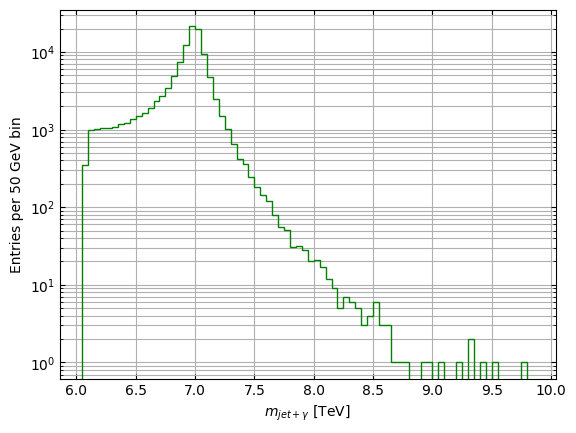

<Figure size 640x480 with 0 Axes>

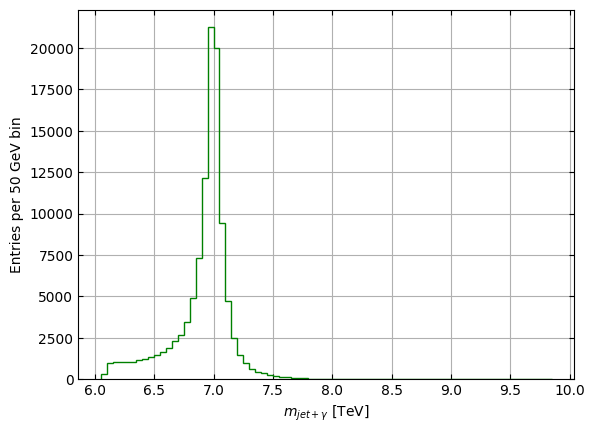

<Figure size 640x480 with 0 Axes>

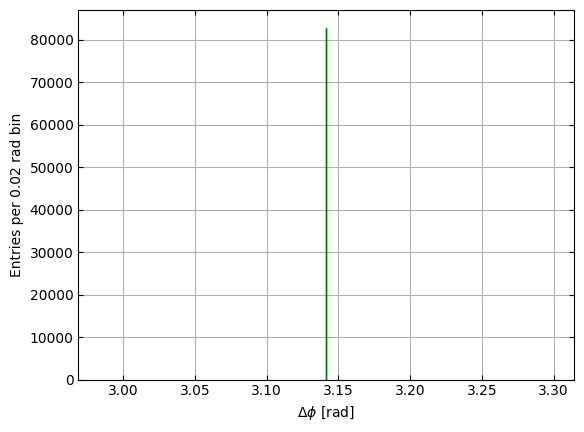

<Figure size 640x480 with 0 Axes>

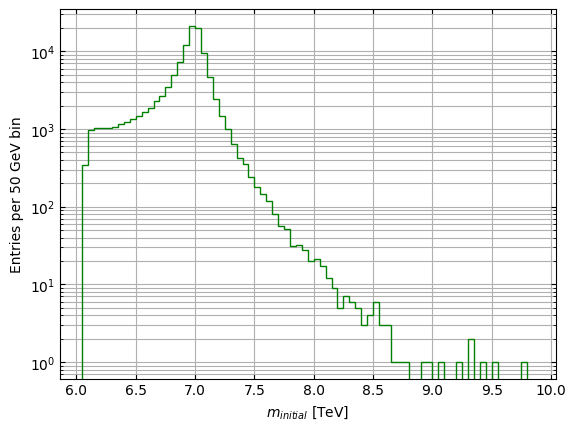

<Figure size 640x480 with 0 Axes>

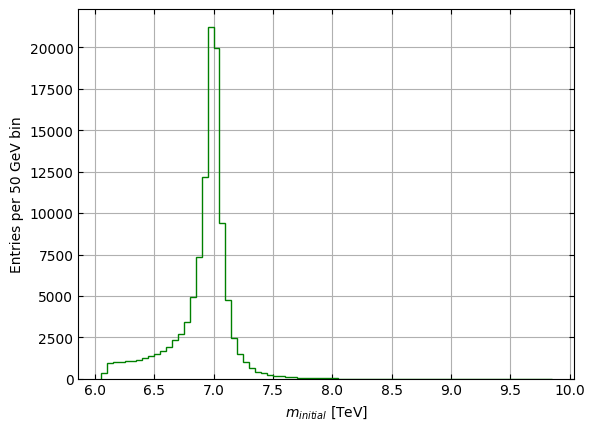

<Figure size 640x480 with 0 Axes>

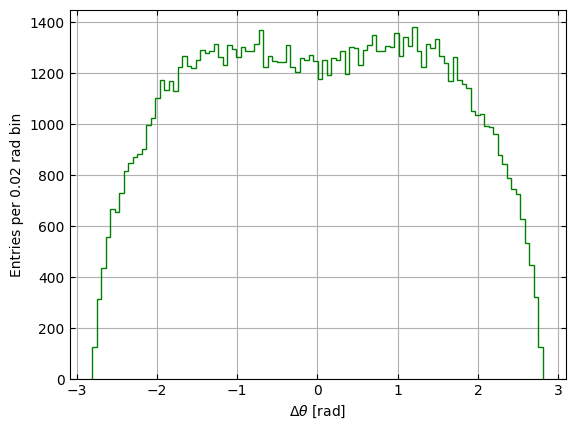

<Figure size 640x480 with 0 Axes>

In [106]:
# Get the arrays that involve the jet and the photon

array = [mjgamma, m_initial]
angleArray = [del_phi, del_theta]
arrayLabel = ['$m_{jet+\gamma}$ [TeV]', '$m_{initial}$ [TeV]', 'y', 'Y']
angleLabel = [r'$\Delta \phi$ [rad]', r'$\Delta \theta$ [rad]']
arrayName = ['mjgamma', 'm_initial', 'y', 'Y']
angleName = ['del_phi.pdf', 'del_theta.pdf']

for i in range(len(angleName)):
    moreHist(array[i], angleArray[i], arrayLabel[i], angleLabel[i], arrayName[i], angleName[i], '70p6Ms')

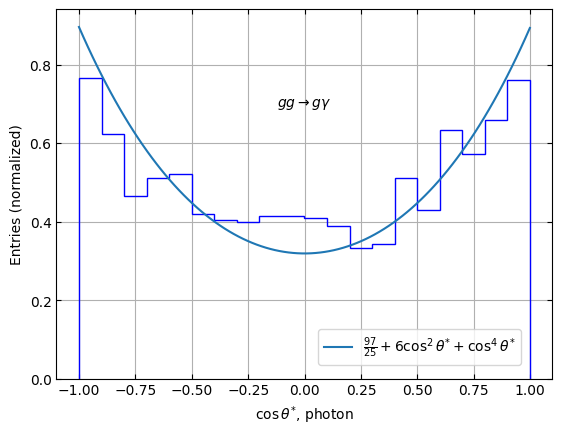

<Figure size 640x480 with 0 Axes>

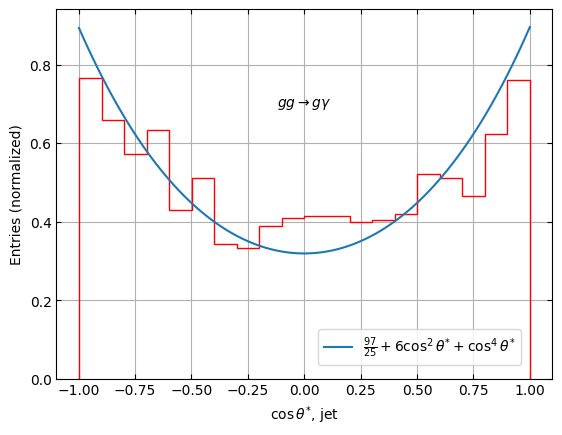

<Figure size 640x480 with 0 Axes>

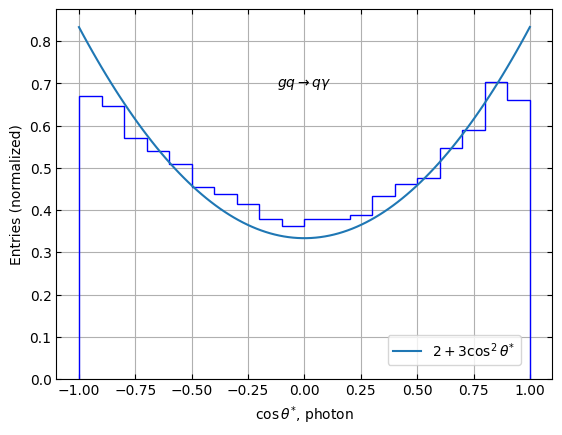

<Figure size 640x480 with 0 Axes>

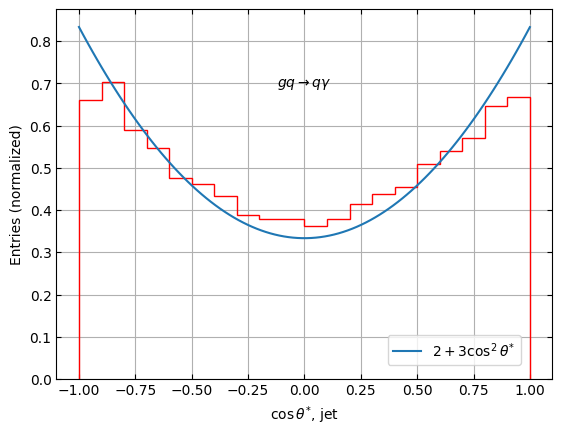

<Figure size 640x480 with 0 Axes>

In [25]:
## cosThetaStar plots

array = [cosThetaStar_photon_6, cosThetaStar_jet_6, cosThetaStar_photon_7, cosThetaStar_jet_7]
array2 = [cosTheta_photon_6, cosTheta_jet_6, cosTheta_photon_7, cosTheta_jet_7]
labels = [r'$\cos{\theta^{*}}$, photon', r'$\cos{\theta^{*}}$, jet', r'$\cos{\theta^{*}}$, photon', r'$\cos{\theta^{*}}$, jet']
labels2 = [r'$\cos{\theta}$, photon', r'$\cos{\theta}$, jet', r'$\cos{\theta}$, photon', r'$\cos{\theta}$, jet']
names = ['cosThetaStar_photon_6.pdf', 'cosThetaStar_jet_6.pdf', 'cosThetaStar_photon_7.pdf', 'cosThetaStar_jet_7.pdf']
names2 = ['cosTheta_photon_6.pdf', 'cosTheta_jet_6.pdf', 'cosTheta_photon_7.pdf', 'cosTheta_jet_7.pdf']
color = ['blue', 'red', 'blue', 'red']
process = [r'$gg \rightarrow{} g\gamma$', r'$gg \rightarrow{} g\gamma$', r'$gq \rightarrow{} q\gamma$', r'$gq \rightarrow{} q\gamma$']
codes = [0,0,1,1]

def cosplot(array, label, name, color, process, codes, stringscale):

    fig, ax = plt.subplots()
    minval, maxval = min(array), max(array)
    bin_width = (maxval - minval) / 20
    histogram_area = ( len(array)+1 )*bin_width

    bins = np.arange(minval, maxval+bin_width, bin_width)
    bin_centers = [0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)]

    counts, bins, _ = ax.hist(array, bins=bins, color='white', edgecolor=color, alpha=1)
    counts = counts / histogram_area
    ax.clear()
    ax.hist(bin_centers, bins=bins, weights=counts, edgecolor=color, color='white', alpha=1, histtype='step')

    ax.set_xlabel(label)
    ax.set_ylabel('Entries (normalized)')
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)

    if codes == 0:
        def f(x):
            return 97/25 + (6*(x**2)) + x**4
        def g(x):
            return (97/25 * x) + (2 * x**3) + (1/5 * x**5)

        x = np.linspace(min(array), max(array), 100)
        y = []

        for i in range(len(x)):
            y.append(f(x[i]) / (g(max(array)) - g(min(array))) )
        plt.plot(x, y, label=r'$\frac{97}{25} + 6\cos^2\theta^{*} + \cos^4\theta^{*}$')

    if codes == 1:
        def f(x):
            return 2 + (3*(x**2))
        def g(x):
            return (2 * x) + (x**3)

        x = np.linspace(min(array), max(array), 100)
        y = []

        for i in range(len(x)):
            y.append(f(x[i]) / (g(max(array)) - g(min(array))) )
        plt.plot(x, y, label=r'$2 + 3\cos^2\theta^{*}$')

    plt.text(0, 0.7, process, va='center', ha='center')
    plt.legend(loc='lower right', bbox_to_anchor=(0.95, 0.02))
    plt.grid(True, which='both', axis='y')
    plt.grid(True, which='both', axis='x')

    plt.savefig('./Histograms/'+stringscale+name,dpi=100,bbox_inches='tight',format='pdf')
    plt.show()
    plt.clf()

for i in range(len(array)):
    cosplot(array[i], labels[i], names[i], color[i], process[i], codes[i], '50Ms')

#for i in range(len(array)):
#    cosplot(array2[i], labels2[i], names2[i], color[i], process[i], codes[i], 'smallWindow')

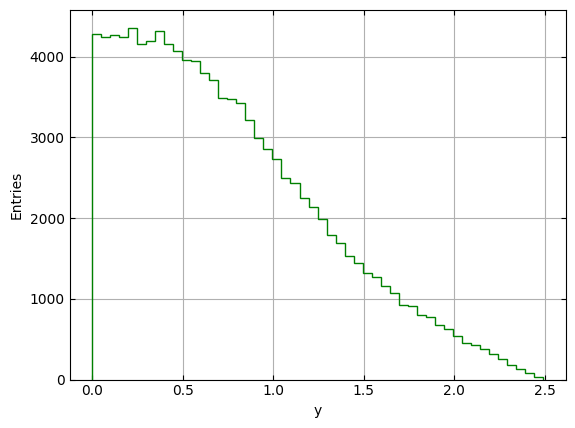

<Figure size 640x480 with 0 Axes>

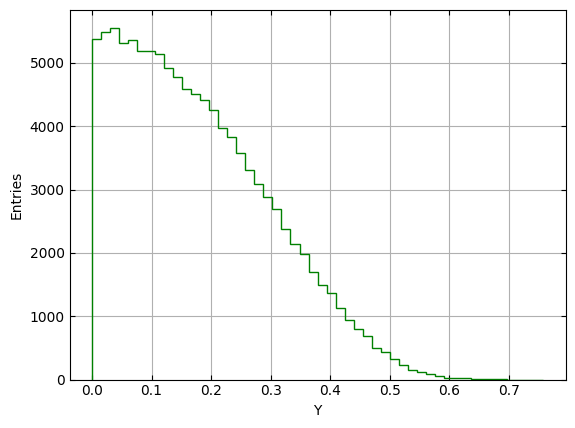

<Figure size 640x480 with 0 Axes>

In [108]:
array, labels, names = [y, Y], ['y', 'Y'], ['ysmall', 'Ybig']
stringscale = '70p6Ms'
for i in range(len(array)):
    fig, ax = plt.subplots()
    ax.hist(array[i], bins=50, color='white', edgecolor='green', alpha=1, histtype='step')
    ax.set_ylabel('Entries')
    ax.set_xlabel(labels[i])
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    plt.savefig('./Histograms/'+stringscale+names[i]+'.pdf')
    plt.show()
    plt.clf()

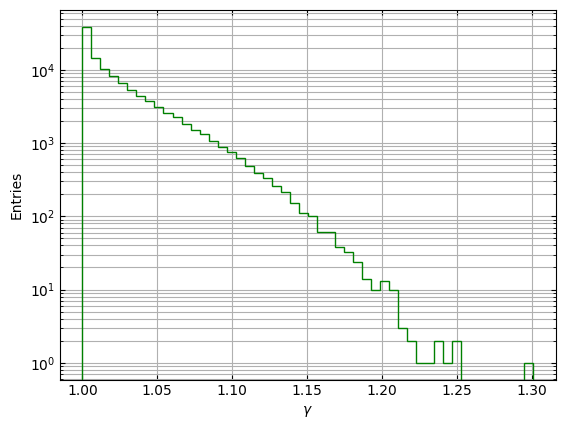

<Figure size 640x480 with 0 Axes>

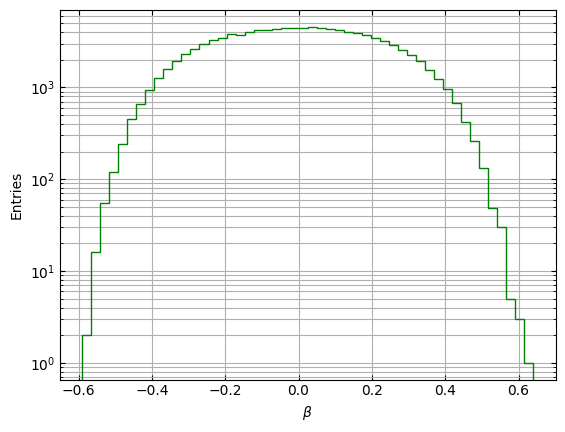

<Figure size 640x480 with 0 Axes>

In [109]:
array, labels, names = [gamma, beta], [r'$\gamma$', r'$\beta$'], ['gamma', 'beta']
stringscale = '70p6Ms'
for i in range(len(array)):
    fig, ax = plt.subplots()
    ax.hist(array[i], bins=50, color='white', edgecolor='green', alpha=1, histtype='step')
    ax.set_ylabel('Entries')
    ax.set_yscale('log')
    ax.set_xlabel(labels[i])
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    plt.savefig('./Histograms/'+stringscale+names[i]+'.pdf')
    plt.show()
    plt.clf()

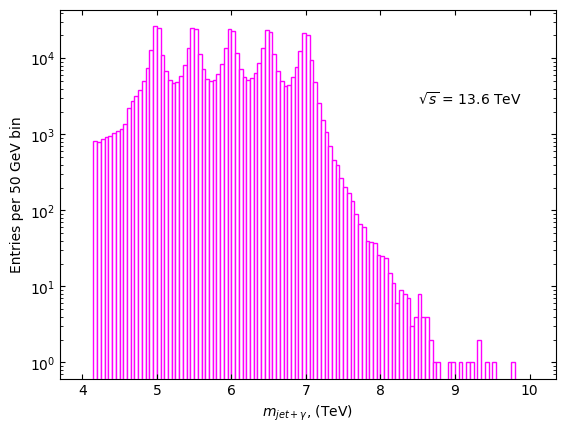

[ 4.    4.05  4.1   4.15  4.2   4.25  4.3   4.35  4.4   4.45  4.5   4.55
  4.6   4.65  4.7   4.75  4.8   4.85  4.9   4.95  5.    5.05  5.1   5.15
  5.2   5.25  5.3   5.35  5.4   5.45  5.5   5.55  5.6   5.65  5.7   5.75
  5.8   5.85  5.9   5.95  6.    6.05  6.1   6.15  6.2   6.25  6.3   6.35
  6.4   6.45  6.5   6.55  6.6   6.65  6.7   6.75  6.8   6.85  6.9   6.95
  7.    7.05  7.1   7.15  7.2   7.25  7.3   7.35  7.4   7.45  7.5   7.55
  7.6   7.65  7.7   7.75  7.8   7.85  7.9   7.95  8.    8.05  8.1   8.15
  8.2   8.25  8.3   8.35  8.4   8.45  8.5   8.55  8.6   8.65  8.7   8.75
  8.8   8.85  8.9   8.95  9.    9.05  9.1   9.15  9.2   9.25  9.3   9.35
  9.4   9.45  9.5   9.55  9.6   9.65  9.7   9.75  9.8   9.85  9.9   9.95
 10.   10.05]


<Figure size 640x480 with 0 Axes>

In [180]:
# Script for making a histogram of all the masses superimposed on eachother

masses1 = np.concatenate((mjgamma1, mjgamma2, mjgamma3))
masses2 = np.concatenate((mjgamma4, mjgamma5))
masses = np.concatenate((masses1, masses2))

fig, ax = plt.subplots()

bin_width = 0.05
minval, maxval = 4, 10
bins = np.arange(minval, maxval + bin_width, bin_width)

ax.hist(masses, bins=bins, color='white', edgecolor='magenta', alpha=1)
ax.set_xlabel('$m_{jet + \gamma}$, (TeV)')
ax.set_ylabel('Entries per 50 GeV bin')
ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)

ax.set_yscale('log')

plt.text(8.5, 2.5e3, r'$\sqrt{s}$ = 13.6 TeV')

plt.savefig('./Histograms/13p6TeVlog.pdf',dpi=100,bbox_inches='tight',format='pdf')
plt.show()
plt.clf()

print(bins)

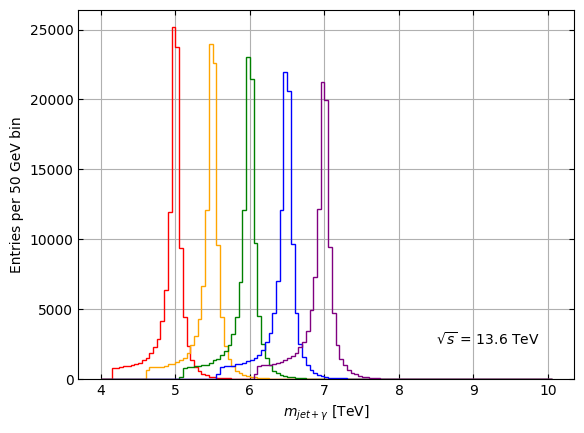

<Figure size 640x480 with 0 Axes>

In [123]:
masses = [mjgamma1, mjgamma2, mjgamma3, mjgamma4, mjgamma5]
colors = ['red', 'orange', 'green', 'blue', 'purple']
fig, ax = plt.subplots()

for i in range(len(masses)):
    bin_width = 0.05
    minval = 4
    maxval = 10
    bins = np.arange(minval, maxval + bin_width, bin_width)
    ax.hist(masses[i], bins=bins, color='white', edgecolor=colors[i], alpha=1, histtype='step')

ax.set_xlabel('$m_{jet + \gamma}$, (TeV)')
ax.set_ylabel('Entries per 50 GeV bin')
ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)

ax.set_yscale('log')

plt.text(8.5, 2.5e3, r'$\sqrt{s}$ = 13 TeV')

plt.savefig('./Histograms/13p6TeVlog.pdf',dpi=100,bbox_inches='tight',format='pdf')
plt.show()
plt.clf()